In [2]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 50kB/s 
     |████████████████████████████████| 3.0MB 46.6MB/s 
     |████████████████████████████████| 419kB 48.3MB/s 


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras.layers import Dense ,Conv2D ,Conv2DTranspose , MaxPooling2D ,UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [4]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

0

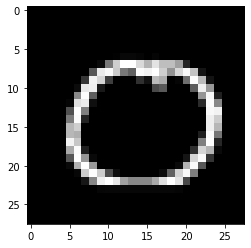

In [7]:
i = random.randint(1,60000) # select any random index from 1 to 60,000

plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image
label = y_train[i]
label

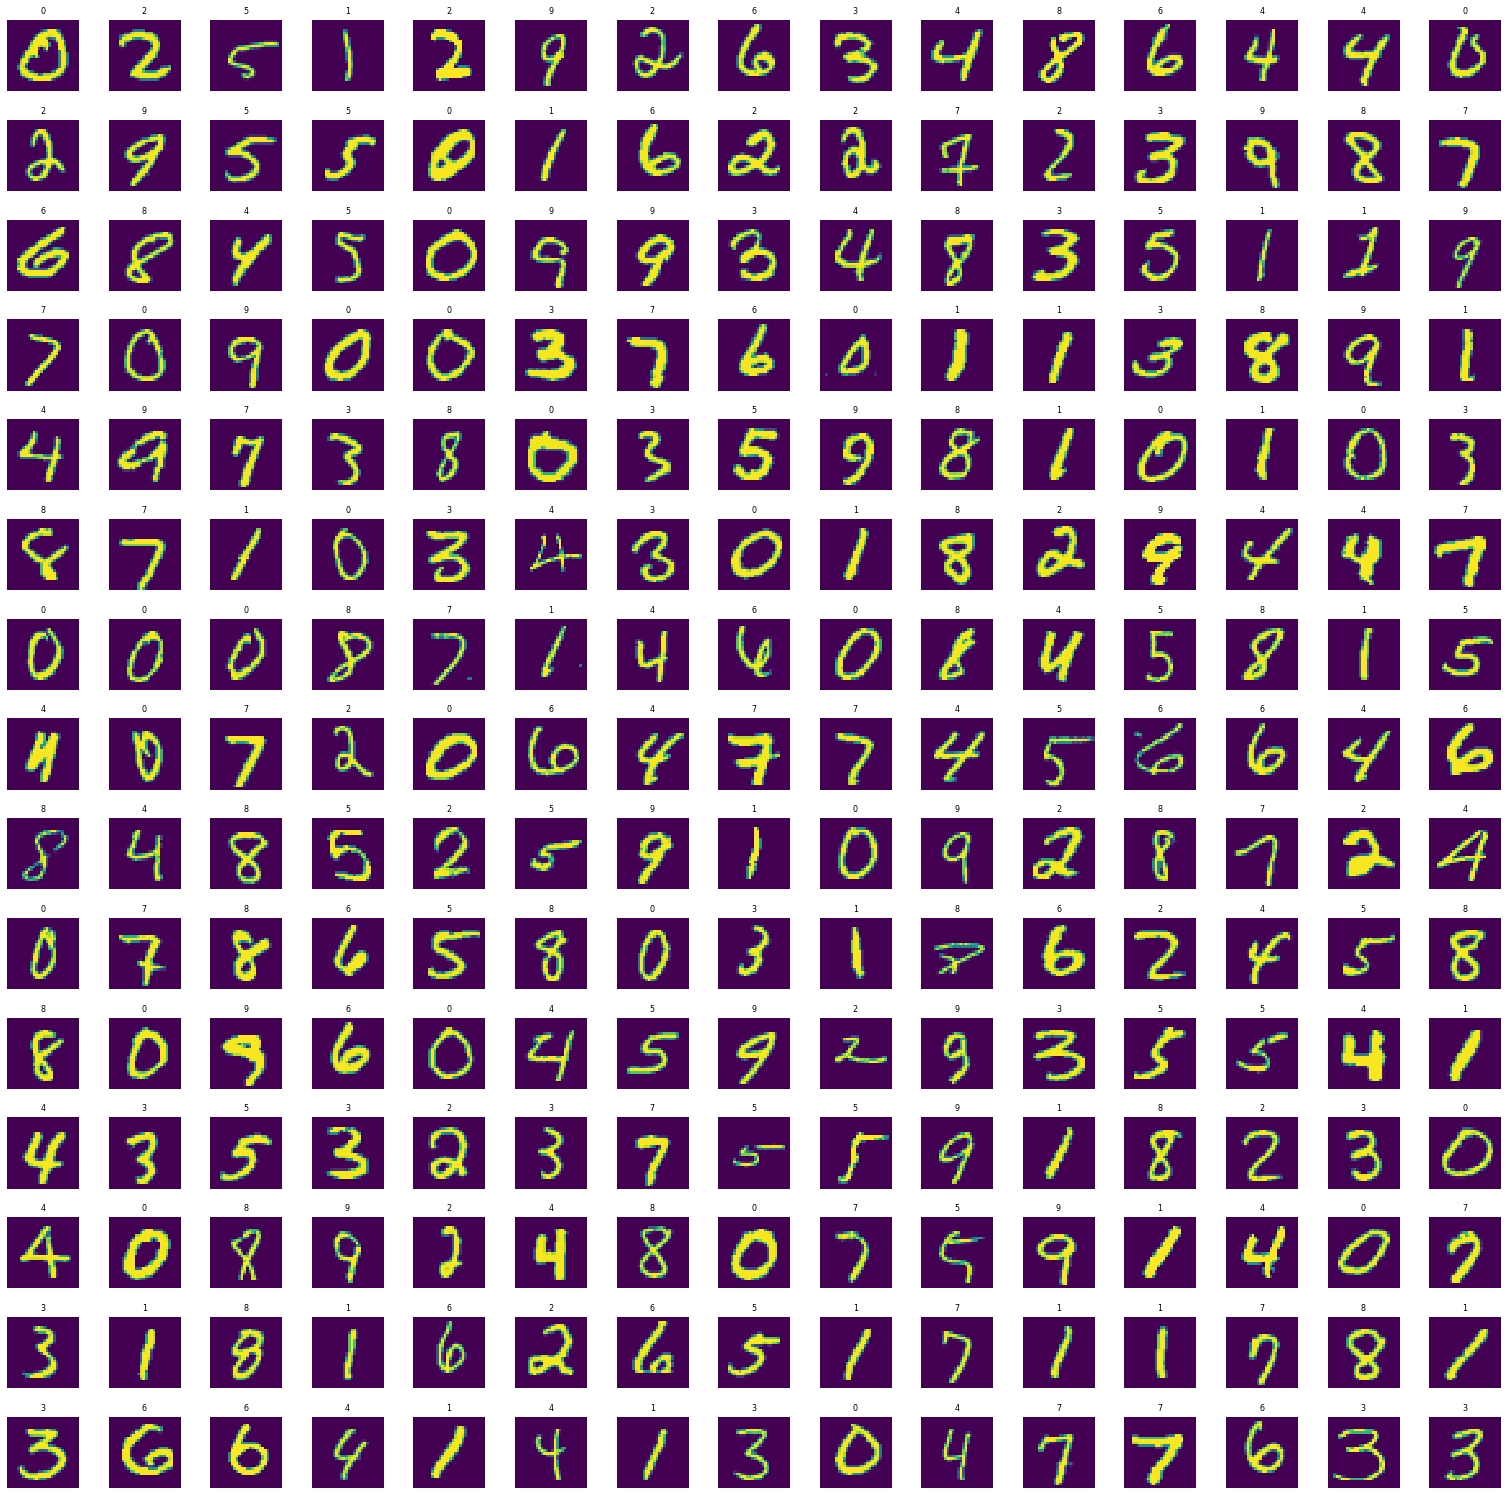

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (27,27))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [0]:
# LET'S ADD SOME artificial NOISE TO OUR DATASET for performing autoincoder technique

In [0]:
# Let's normalize the data
X_train = X_train / 255
X_test = X_test / 255

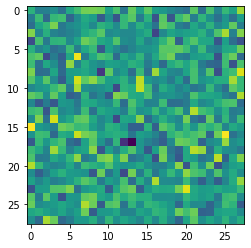

In [11]:
# Let's create some noise with the same dimensions as the original image (28,28)
added_noise = np.random.randn(*(28,28))
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))
plt.imshow(added_noise)

In [0]:
# Let's do the same operation over all the images contained in the training dataset
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)
X_train_noisy = np.array(X_train_noisy)  

In [0]:
# Let's do the same operation for the testing dataset as well
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)

# Convert from list to array
X_test_noisy = np.array(X_test_noisy)

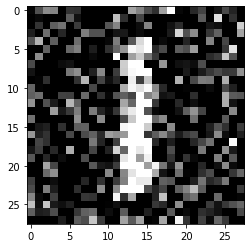

In [14]:
# Let's make sure that the test images are noisy as well!
plt.imshow(X_test_noisy[1011], cmap = 'gray')

In [0]:
#BUILD AND TRAIN OUR AUTOENCODER DEEP LEARNING MODEL

In [0]:
#Encoding
Autoincoder = models.Sequential()
Autoincoder.add(Conv2D(25,(3,3),strides=1,padding='same',input_shape=(28, 28, 1)))
Autoincoder.add(MaxPooling2D((2,2),padding='same'))
Autoincoder.add(Conv2D(12,(3,3),strides=1,padding='same'))
Autoincoder.add(MaxPooling2D((2,2),padding='same'))
# Encoded image (code layer)
Autoincoder.add(Conv2D(15,(3,3),strides=1,padding='same'))
# Decoding
Autoincoder.add(UpSampling2D((2,2)))
Autoincoder.add(Conv2DTranspose(25,(3,3),strides=1,padding='same'))
Autoincoder.add(UpSampling2D((2,2)))
Autoincoder.add(Conv2DTranspose(1,(3,3),strides=1,padding='same',activation='sigmoid'))

In [17]:
Autoincoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 12)        2712      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 15)          1635      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 25)        3

In [0]:
Autoincoder.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))

In [24]:
Autoincoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),          
          X_train.reshape(-1, 28, 28, 1), 
          epochs=10, 
          batch_size=200)

Epoch 1/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1593
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0971
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0913
Epoch 4/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0885
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0867
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0855
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0844
Epoch 8/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0836
Epoch 9/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0829
Epoch 10/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0824


In [0]:
# Let's pick up 15 images and run them through the trained autoencoder
denoised_images = Autoincoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

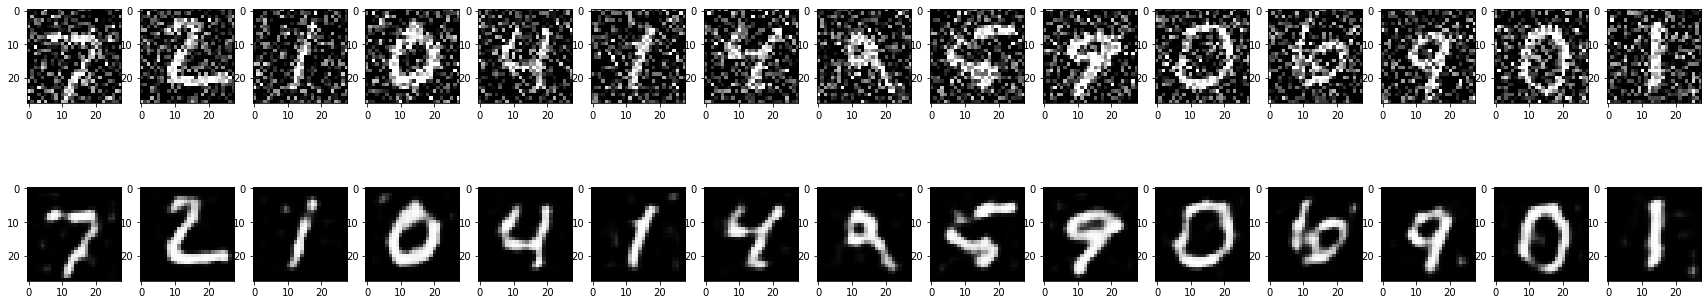

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')
    